### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2024/1): time and frequency domain analysis of sdof systems

---


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt

from MRPy import *


## Questão 1

Uma torre esbelta tem massa equivalente $m = 1.0$ton, rigidez $k = 3EI/L^3$, e amortecimento $\zeta = 1$% (razão do crítico). A altura da massa (e do topo) é $L = 10$m, enquanto a  rigidez à flexão, $EI$, é tal que a frequência natural de vibração livre resulta ser $f_{\rm n} = 0.5$Hz. Sobre a massa atua uma força impulsiva devida ao impacto (perfeitamente elástico) de um projétil de massa $m_{\rm p} = 50$kg que se desloca a uma velocidade $v_{\rm p} = 100$km/h. Pergunta-se:

1. Qual o máximo deslocamento do topo da torre após o impacto?
2. Qual a máxima aceleração do topo da torre após o impacto?
3. Qual a amplitude do deslocamento após transcorrerem 5 segundos?
4. Quais as máximas reações de apoio $M_{\rm A}$ (momento) e $H_{\rm A}$ (força horizontal)? 

<img src="resources/tests/PEC00025A_241_P1_Q1.jpg" alt="Question 1" width="320px"/>


### Cálculo das propriedades do sistema

Nos cálculos abaixo se considera que o projétil rebota após o impacto, sem perdas e,
portanto, terá velocidade $v_{\rm p}$ com o sentido contrário. Isso faz com que a 
quantidade de movimento antes do impacto seja:

$$ Q_0 = m_{\rm p} v_{\rm p} $$

e após o impacto seja:

$$ Q = M V_0 - m_{\rm p} v_{\rm p} $$

Considerando a conservação da quantidade de movimento $Q = Q_0$ têm-se:

$$ V_0 = 2 m_{\rm p} v_{\rm p} / M $$

onde $V_0$ é a velocidade inicial (pós impacto) da massa no topo da torre.


In [2]:
L  =  10.               # altura da torre (m)
M  =  1000.             # massa no topo da torre (kg)
zt =  0.01              # amortecimento razão do crítico
fn =  0.5               # frequência fundamental da torre (Hz)
wn =  2*fn*np.pi        # frequência fundamental em rad/s
Tn =  1/fn              # período de vibração (s)

mp =  50.               # massa do projétil
vp =  100/3.6           # velocidade do projétil (m/s)
Qp =  mp*vp             # quantidade de movimento inicial

g  =  9.81              # gravidade (m/s2)

k  =  M*wn*wn           # coeficiente de rigidez
EI =  k*(L**3)/3        # rigidez à flexão da torre

V0 =  2*Qp/M            # o projétil REBOTA com a mesma velocidade vp!!!
Td =  Tn/4.             # máxima duração do contato para ser Dirac
Lp =  vp*Td/2           # mínimo comprimento do projétil (onda vai e volta)

print('Rigidez da torre ...................  k = {0:7.2f} kN/m'.format(k/1000))
print('Rigidez à flexão da torre .......... EI = {0:7.1f} kNm2'.format(EI/1000))
print('Velocidade inicial do projétil ..... vp = {0:7.1f} m/s\n'.format(vp))
print('Máxima duração para ser Dirac ...... Td = {0:7.2f} s'.format(Td))
print('Mínimo comprimento do projétil ..... Lp = {0:7.2f} m\n'.format(Lp))

print('Velocidade da torre após impacto ... V0 = {0:7.2f} m/s'.format(V0))


Rigidez da torre ...................  k =    9.87 kN/m
Rigidez à flexão da torre .......... EI =  3289.9 kNm2
Velocidade inicial do projétil ..... vp =    27.8 m/s

Máxima duração para ser Dirac ...... Td =    0.50 s
Mínimo comprimento do projétil ..... Lp =    6.94 m

Velocidade da torre após impacto ... V0 =    2.78 m/s


### 1) Deslocamento máximo

Considerando portanto que o projétil tenha comprimento menor que 6.94m, o que garante
um tempo de contato inferior a 0.50s (1/4 do período de vibração da torre), podemos
considerar que o impulso é de curtíssima duração. Consequentemente, a resposta
dinâmica será a resposta à velocidade inicial $V_0 = 2.78$m/s calculada.


In [3]:
wD   =  wn*np.sqrt(1 - zt*zt)
umax = (V0/wD)*np.exp(-zt*wn*Tn/4)    # o pico ocorre após 1/4 do período

print('Deslocamento após 1/4 do período .......... u_max = {0:5.2f} m'.format(umax))


Deslocamento após 1/4 do período .......... u_max =  0.87 m


O cálculo abaixo apresenta o resultado correto para essa questão utilizado
uma integração por Duhamel.


Deslocamento máximo por simulação ......... u_pk  =  0.86 m


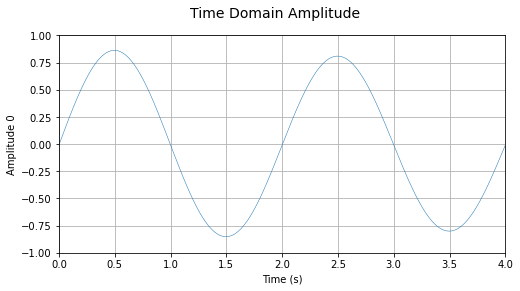

In [4]:
F   =  MRPy.zeros(NX=1, N=4096, fs=1024.)
u1  =  F.sdof_Duhamel(fn, zt, U0=0., V0=V0).zero_mean()
upk =  np.max(u1[0])

print('Deslocamento máximo por simulação ......... u_pk  = {0:5.2f} m'.format(upk))

u1.plot_time(fig=1, figsize=[8,4], axis_t=[0, u1.Td, -1, 1]);


### 2) Máxima aceleração da torre após impacto

Estritamente falando a aceleração da torre é infinita, pois ela passa de
velocidade zero a uma velocidade imposta $V_0$. Por outro lado, vamos também
calcular a aceleração após o início da vibração livre, ou seja, decorrido
um tempo igual a 1/8 do período de modo a se observar o primeiro pico.

Podemos considerar que a resposta é não-amortecida nos primeiros ciclos. Assim
a aceleração, sendo a segunda derivada do deslocamento, pode ser aproximada
(desconsiderando-se o amortecimento) como:

$$ a_{\rm max} = w_{\rm n}^2 \; u_{\rm max} $$


In [5]:
amax = wn*wn*umax

print('Aceleração máxima por derivação ........... a_max = {0:5.2f} m/s2'.format(amax))


Aceleração máxima por derivação ........... a_max =  8.59 m/s2


Isso também pode ser calculado derivando-se duas vezes a resposta simulada:


Aceleração máxima por simulação ............ a_pk =  8.67 m/s2


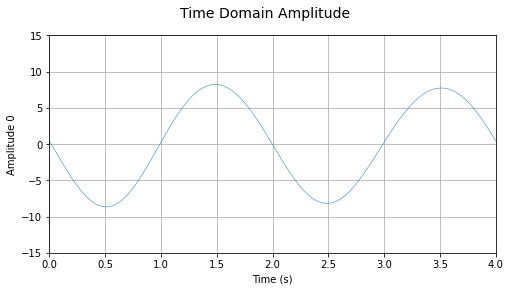

In [6]:
band = [0, 2*fn]
a1   =  u1.differentiate(band=band).differentiate(band=band)
apk  = -np.min(a1[0][a1.t_axis() > 0.2])

print('Aceleração máxima por simulação ............ a_pk = {0:5.2f} m/s2'.format(apk))

a1.plot_time(fig=2, figsize=[8,4], axis_t=[0, a1.Td, -15, 15]);


Percebe-se, portanto, um erro associado à integração numérica logo no início da série temporal.


### 3) Amplitude do deslocamento após 5s

Como o período é de 2s, após 5s terão transcorridos 2 períodos e meio. Neste exato instante 
a amplitude do deslocamento é zero. 

Por outro lado, também podemos entender essa amplitude como o multiplicador (envelope exponencial)
da solução teórica para a vibração livre, que decai exponencialmente conforme a razão de
amortecimento.


In [7]:
udamp = umax*np.exp(-zt*wn*5.0)     # decaimento do envelope após 5s.

print('Deslocamento após 1/4 do período ........... u_max = {0:5.2f} m'.format(umax))
print('Amplitude do envelope após 5s ............. u_damp = {0:5.2f} m'.format(udamp))


Deslocamento após 1/4 do período ........... u_max =  0.87 m
Amplitude do envelope após 5s ............. u_damp =  0.74 m


Portanto, em 5s a amplitude do deslocamento decresceu $\approx 13$cm.


### 4) Máximas reações de apoio $M_{\rm A}$ e $H_{\rm A}$

As máximas reações podem ser estimadas a partir da força estática equivalente. 
Para isso, vamos usar o deslocamento máximo da questão (1).


In [8]:
Feq = umax*k           # força estática equivalente

MA  = L*Feq            # momento reativo
HA  = Feq              # reação vertical

print('Máximo momento reativo no engaste ........... M_A = {0:5.1f} kNm'.format(MA/1000))
print('Máxima reação horizontal no engaste ......... H_A = {0:5.1f} kN'.format(HA/1000))


Máximo momento reativo no engaste ........... M_A =  85.9 kNm
Máxima reação horizontal no engaste ......... H_A =   8.6 kN


Observa-se que a força estática equivalente (igual à reação horizontal na fundação) 
atinge quase o valor correspondente ao peso próprio da torre.


## Questão 2

A mesma torre da questão anterior é submetida à força do vento atuando sobre a massa, descrita na forma de uma densidade espectral dada abaixo. 

5. Qual o valor r.m.s. do deslocamento do topo da torre? 
6. Qual o valor de pico da aceleração no topo da torre?
7. Quais as máximas reações de apoio MA (momento) e HA (força horizontal)?
8. Após 64 segundos, por quanto tempo o momento MA superou metade do valor máximo?

<img src="resources/tests/PEC00025A_241_P1_Q2.jpg" alt="Question 2" width="640px"/>  


### Cálculo do espectro do deslocamento

Lembrando que na análise no domínio da frequência o espectro do deslocamento
é calculado com a função de admitância mecânica:

$$ S_U(f) = \lvert H(f) \rvert^2 \; S_F(f) $$

onde:

$$ \lvert H(f) \rvert^2 = \frac{1}{k^2} \; \left[ \frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2} \right]$$

com $\beta = f \, / \, f_{\rm n}$.

Como o espectro da força é do tipo banda limitada em 1Hz, o espectro do deslocamento não terá
energia a partir deste limite. 


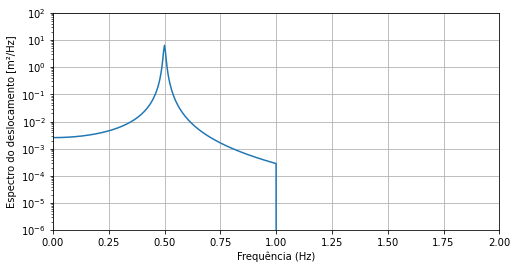

In [9]:
fs  = 4.                                 # taxa de amostragem (Nyquist é fs/2)
f   = np.linspace(0, fs/2, 513)          # discretização do domínio da frequência
SF  = np.zeros_like(f)                   # o espectro da força ...
SF[f <= 1.] = 250000.                    # ... tem valor constante até f = 1Hz

H2  = lambda fi: 1/( (1 - (fi/fn)**2)**2 + (2*zt*(fi/fn))**2 )/(k**2)
SU  = H2(f)*SF

plt.figure(3, figsize=(8,4), clear=True)
plt.semilogy(f, SU);
plt.grid(True)
plt.axis([0, 2, 1e-6, 1e+2])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Espectro do deslocamento [m²/Hz]');


### 5) Valor r.m.s. do deslocamento no topo

O variância do deslocamento é a integral da respectiva densidade espectral.
O valor r.m.s. (no caso é o mesmo que o desvio padrão, já que a média é zero) é
a raiz quadrada da variância.

$$ u_{\rm rms}^2 = \frac{f_{\rm n} S_F}{k^2} \int_0^{f_{\rm max}}{\left[ \frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2} \right] \; d\beta} $$

onde 

$$d\!f = f_{\rm n} \, d\beta $$

e $S_F$ é constante de $0$ a $f_{\rm max}$.


In [10]:
urms = np.sqrt(np.trapz(SU, f))

print('Valor r.m.s. do deslocamento no topo ...... u_rms = {0:5.3f} m'.format(urms))


Valor r.m.s. do deslocamento no topo ...... u_rms = 0.317 m


O módulo ``MRPy`` permite simular a resposta a partir de um dado espectro.


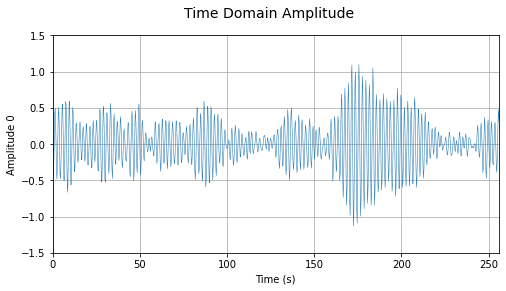

In [11]:
u2 = MRPy.from_periodogram(SU, fs)

u2.plot_time(fig=4, figsize=[8,4], axis_t=[0, u2.Td, -1.5, 1.5]);


### 6) Valor de pico da aceleração no topo

Pode-se usar a transformada de Fourier para calcular a aceleração como sendo a
dupla derivada do deslocamento no domínio da frequência. O espectro da aceleração é 
então calculado com a relação:

$$ S_A(f) = \omega^4 S_U(f) $$ 


In [12]:
SA   = SU * (2*np.pi*f)**4

arms = np.sqrt(np.trapz(SA, f))

print('Valor r.m.s. da aceleração no topo ........ a_rms = {0:5.3f} m/s2'.format(arms))


Valor r.m.s. da aceleração no topo ........ a_rms = 3.151 m/s2


O fator de pico pode ser calculado utilizando-se a fórmula de Davenport 
com a simplificação de que a taxa de _upcrossing_ de zero é aproximadamente igual à 
frequência fundamental (processo banda estreita), $\nu_0^{+} \approx f_{\rm n}$. 

$$g = \sqrt{2 \ln (\nu_0^{+} T)} + \frac{0.5772}{\sqrt{2 \ln (\nu_0^{+} T)}}$$

onde T é o tempo de observação, que será tomado como 64s. 

O valor de pico da aceleração é dado por:

$$ a_{\rm peak} = g \; a_{\rm rms}$$


In [13]:
T   = 64.      # tempo de observação
nu0 = fn       # aproximação, mas geralmente nu0 é menor que fn

lnu = np.sqrt(2*np.log(T*nu0))
gp  = lnu + 0.5772/lnu

apk = gp*arms

print('Fator de pico para 64s ........................ g = {0:4.2f}'.format(gp))
print('Valor de pico em 64s da aceleração ......... a_pk = {0:4.2f} m/s2'.format(apk))


Fator de pico para 64s ........................ g = 2.85
Valor de pico em 64s da aceleração ......... a_pk = 8.99 m/s2


Já que o espectro da aceleração está disponível, também é possível simulá-lo
utilizando-se o módulo ``MRPy``.


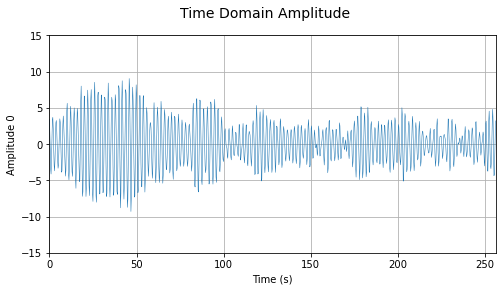

In [14]:
a2 = MRPy.from_periodogram(SA, fs)

a2.plot_time(fig=5, figsize=[8,4], axis_t=[0, a2.Td, -15, 15]);


Pode-se verificar pela simulação acima que o pico da aceleração corresponde 
aproximadamente ao valor teórico anteriormente calculado.


### 7) Máximas reações de apoio $M_{\rm A}$ e $H_{\rm A}$

Para calcular estas reações é necessário primeiro calcular o deslocamento de pico.
Para isso, podemos usar o mesmo fator de pico da questão anterior, multiplicando
o valor r.m.s. do deslocamento no topo.


In [15]:
upk = gp*urms          # deslocamento de pico
Feq = upk*k            # força estática equivalente

MA  = L*Feq            # momento reativo
HA  = Feq              # reação vertical

print('Valor de pico do deslocamento no topo ...... u_pk = {0:4.2f} m'.format(upk))
print('Máximo momento reativo no engaste ........... M_A = {0:4.1f} kNm'.format(MA/1000))
print('Máxima reação horizontal no engaste ......... H_A = {0:4.1f} kN'.format(HA/1000))


Valor de pico do deslocamento no topo ...... u_pk = 0.91 m
Máximo momento reativo no engaste ........... M_A = 89.4 kNm
Máxima reação horizontal no engaste ......... H_A =  8.9 kN


O valor de pico do deslocamento apresentado acima corresponde aproximadamente ao 
valor observado na simulação apresentada na questão (5).


### 8) Número de upcrossings em 64s

Como referência para qualquer resultado teórico aproximado, vamos obter esse
número a partir da simulação feita na questão (5). Vamos considerar que o momento
na base (estático equivalente) é proporcional ao deslocamento no topo e que,
portanto, a contagem pode ser igualmente feita pela observação de $u(t)$.


Metade do deslocamento de pico ..................... u_thr = 0.45 m
Número de upcrossings em 64 segundos ................... N = 10.5
Número aproximado de zero crossings ................... N0 = 32.0


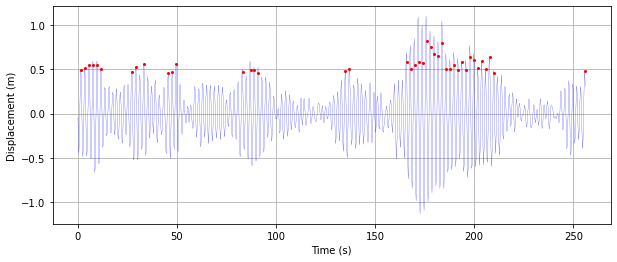

In [16]:
t    =  u2.t_axis()                        # eixo do tempo
uthr =  upk/2                              # valor threshold para contagem (metade do pico)

u    =  np.append(u2[0], 0)                # anexa mais um ponto ...
kthr = (u[:-1] > uthr) & (u[1:] <= uthr)   # ... busca pontos de upcrossing ...
u    =  u[:-1]                             # ... e remove ponto inserido

tcross = t[kthr]                           # seleciona só os pontos de cruzamento
ucross = u[kthr]

plt.figure(6, figsize=[10,4], clear=True)
plt.plot(t, u, 'b', lw=0.2)
plt.plot(tcross, ucross, 'ro', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid(True)

Ncross = np.sum(kthr)*(64./u2.Td)           # faz a média para 64s

print('Metade do deslocamento de pico ..................... u_thr = {0:4.2f} m'.format(uthr))
print('Número de upcrossings em 64 segundos ................... N = {0:4.1f}'.format(Ncross))
print('Número aproximado de zero crossings ................... N0 = {0:4.1f}'.format(64./Tn))


A estimativa mais simples para esse cálculo é considerar que ocorre um _upcrossing_ de zero
a cada período de vibração, o que daria 32 _upcrossings_ em 64s. Contudo, o cruzamento
de níveis mais altos acontece com uma taxa menor.

Como não foi dada em aula a teoria para que se fizesse esse cálculo com mais precisão,
a questão está anulada e os alunos recebem 1.25 pontos (10 pontos / 8 questões) para 
compensar o erro do Professor ;-) .

Contudo, vamos deixar aqui a expressão tirada do livro do Newland (_An Introduction
to Random Vibrations and Spectral Analysis_), capítulo 8.

A taxa de ultrapassagem de um nível arbitrário, $a$, para um processo banda estreita 
(a resposta de um sistema com 1 g.d.l pouco amortecido a uma excitação banda larga 
resulta em um processo banda estreita porque ocorre predominantemente na frequência 
natural o sistema) é dada por:

$$ \nu_a^{+} = \nu_0^{+} \exp \left( -a^2 / 2 \sigma^2 \right) $$

onde $\sigma$ é o desvio padrão (raiz da variância) do processo e a taxa de 
ultrapassagem do zero é aproximadamente $\nu_0^{+} \approx f_{\rm n}.$
O número de upcrossings é simplesmente o produto da taxa de ultrapassagem pelo
tempo de observação:

$$ N_a^{+} = \nu_a^{+} T$$

Portanto:


In [17]:
a   = upk/2
nu0 = fn
sig = urms

nu2 = nu0*np.exp(-(1/2)*((a/sig)**2))

print('Número de upcrossings em 64 segundos ................... N = {0:4.1f}'.format(nu2*64.))


Número de upcrossings em 64 segundos ................... N = 11.6


Este valor confere com boa precisão a estimativa feita por simulação.
